In [19]:
"""
Author: Ryan Quirk, Huntley Hedrick, Matthew Griffith
Files: Analysis.ipynb, soccer_data.xlsx
Project Description: 
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("soccer_data.xlsx") 

# First visualization shows the average number of goals per age ranges
# Age ranges are >20, 20-24, 25-29, 30+


age_count = {}
b20 = []
b25 = []
b30 = []
b35 = []
a35 = []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals"]

    if age in age_count.keys():
        age_count.update({age: age_count[age] + 1})
    else:
        age_count.update({age: 1})

    if age < 20:
        b20.append(goals)
        continue
    elif age < 25:
        b25.append(goals)
        continue
    elif age < 30:
        b30.append(goals)
        continue
    elif age < 35:
        b35.append(goals)
        continue
    else:
        a35.append(goals)

ranges = [">20", "20-24", "25-29", "30-34", "35+"]
values = [sum(b20)/len(b20), sum(b25)/len(b25), sum(b30)/len(b30), sum(b35)/len(b35), sum(a35)/len(a35) ]


### The Code Above:

Calculates the values for the plots below. It does this by iterating through the dataset and tallying each player that has a certain age. While iterating, it also checks for which age range the player belongs in and adds their goals to that age range. Finally with the goal values populated per each age range, create a list of the average goals per age range.

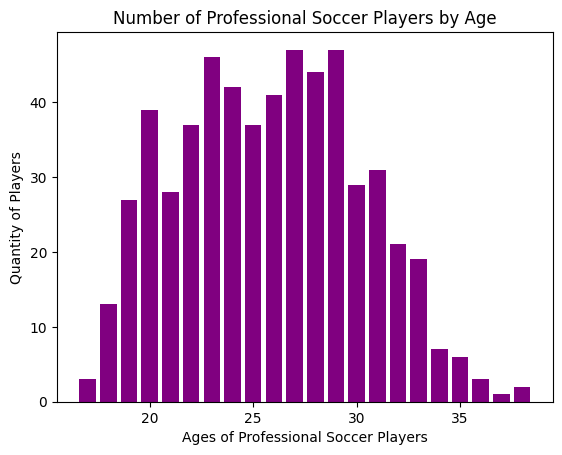

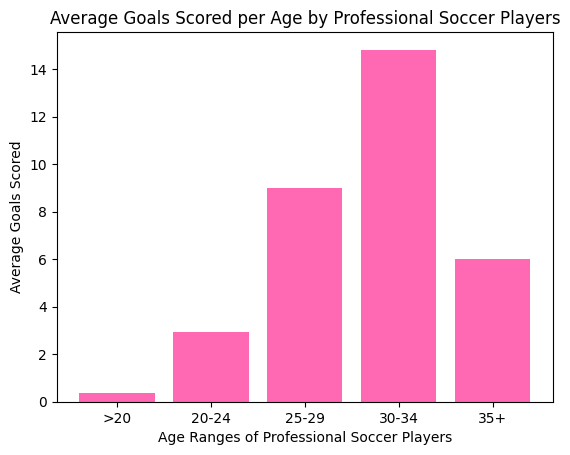

In [20]:
# Quantity of players sorted by age
plt.bar(age_count.keys(), age_count.values(), color="purple")
plt.xlabel("Ages of Professional Soccer Players")
plt.ylabel("Quantity of Players")
plt.title("Number of Professional Soccer Players by Age")
plt.show()


# Average Number of Goals Scored per Age Range
plt.bar(ranges, values, color="hotpink")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored")
plt.title("Average Goals Scored per Age by Professional Soccer Players")
plt.show()


### Analysis

Interesting insight can be seen from the graphs above. The first graph showing that the average age of professional soccer players around 25 years old with outliers in the population lingering above 35. Furthermore the second graph shows that older players score higher goals on average with the range 30-34 scoring the highest.

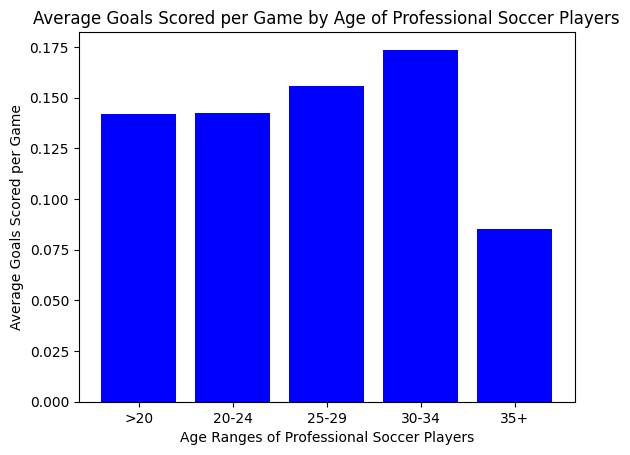

In [21]:
# Initialize dictionaries and lists
new_age_count = {}
nb20, nb25, nb30, nb35, na35 = [], [], [], [], []

for index, row in df.iterrows():
    age = row["Age"]
    goals = row["Goals per match"]
    goalCheck = row["Goals"]

    # Skip rows with missing or invalid values
    if pd.isnull(goals) or goals > 0.99:
        continue

    # Update age count
    if age in new_age_count:
        new_age_count[age] += 1
    else:
        new_age_count[age] = 1

    # Categorize goals based on age range
    if goalCheck > 0:
        if age < 20:
            nb20.append(goals)
        elif age < 25:
            nb25.append(goals)
        elif age < 30:
            nb30.append(goals)
        elif age < 35:
            nb35.append(goals)
        else:
            na35.append(goals)

# Compute averages safely
new_ranges = [">20", "20-24", "25-29", "30-34", "35+"]
new_values = [
    sum(nb20) / len(nb20) if nb20 else 0,
    sum(nb25) / len(nb25) if nb25 else 0,
    sum(nb30) / len(nb30) if nb30 else 0,
    sum(nb35) / len(nb35) if nb35 else 0,
    sum(na35) / len(na35) if na35 else 0,
]

# Plot the results
plt.bar(new_ranges, new_values, color="blue")
plt.xlabel("Age Ranges of Professional Soccer Players")
plt.ylabel("Average Goals Scored per Game")
plt.title("Average Goals Scored per Game by Age of Professional Soccer Players")
plt.show()


In [22]:
pos_map = {
    'Goalkeeper': 1,
    'Defender': 2,
    'Midfielder': 3,
    'Forward': 4
}

df['Position'] = df['Position'].str.strip().str.title()

# Apply mapping
df['Position_Numeric'] = df['Position'].map(pos_map)

# Check for unmapped positions
unmapped_positions = df[df['Position_Numeric'].isnull()]['Position'].unique()
if len(unmapped_positions) > 0:
    print("Unmapped Positions Found:", unmapped_positions)

# Correct unmapped positions manually (example for typos or alternative spellings)
# You can expand the pos_map or directly fix values in the dataset
# Example:
# df['Position'] = df['Position'].replace({'Mid Fielder': 'Midfielder'})

# After ensuring no NaN values, calculate correlation coefficient
if df['Position_Numeric'].isnull().any():
    print("Fix unmapped positions before calculating correlation.")
else:
    corr = np.corrcoef(df['Position_Numeric'], df['Goals'])[0, 1]
    print("Correlation Coefficient between Position and Goals:", corr)

# print(df)

Correlation Coefficient between Position and Goals: 0.3895369156093649


In [23]:
df_cleaned = df[df['Appearances'] > 0]

pos_map = {
    'Goalkeeper': 1,
    'Defender': 2,
    'Midfielder': 3,
    'Forward': 4
}

df_cleaned['Position'] = df_cleaned['Position'].str.strip().str.title()

# Apply mapping
df_cleaned['Position_Numeric'] = df_cleaned['Position'].map(pos_map)

# Check for unmapped positions
unmapped_positions = df_cleaned[df_cleaned['Position_Numeric'].isnull()]['Position'].unique()
if len(unmapped_positions) > 0:
    print("Unmapped Positions Found:", unmapped_positions)

# Correct unmapped positions manually (example for typos or alternative spellings)
# You can expand the pos_map or directly fix values in the dataset
# Example:
# df['Position'] = df['Position'].replace({'Mid Fielder': 'Midfielder'})

# After ensuring no NaN values, calculate correlation coefficient
if df_cleaned['Position_Numeric'].isnull().any():
    print("Fix unmapped positions before calculating correlation.")
else:
    corr = np.corrcoef(df_cleaned['Position_Numeric'], df_cleaned['Goals'])[0, 1]
    print("Correlation Coefficient between Position and Goals:", corr)
    # corr = np.corrcoef(df_cleaned['Po'])

Correlation Coefficient between Position and Goals: 0.3984861901342884


C:\Users\mg416\AppData\Local\Temp\ipykernel_2216\84834905.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position'] = df_cleaned['Position'].str.strip().str.title()
C:\Users\mg416\AppData\Local\Temp\ipykernel_2216\84834905.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Position_Numeric'] = df_cleaned['Position'].map(pos_map)


In [24]:
target_column = "Wins"

# Filter for numerical columns

f_df = df[df["Position"] == "Forward"]
m_df = df[df["Position"] == "Midfielder"]
d_df = df[df["Position"] == "Defender"]

df_cleaned = df[df["Position"] != "Goalkeeper"]
pos = [f_df, m_df, d_df, df]
label = ["Forward", "Midfielder", "Defender", "General"]

# Iterate through numerical columns and compute correlation with the target column
i = 0
for p in pos:
    numerical_df = p.select_dtypes(include=["number"])

    correlations = {}
    for col in numerical_df.columns:
        if col != target_column:  # Skip the target column itself
            correlations[col] = numerical_df[target_column].corr(numerical_df[col])

    correlations_series = pd.Series(correlations)

    # Sort by correlation values in descending order and take the top 10
    top_correlations = correlations_series.sort_values(ascending=False).head(17)

    # Display horizontally
    print(label[i])
    print(top_correlations.to_frame().T)
    i += 1

f_features = ["Errors leading to goal", "Accurate long balls", "Aerial battles won", "Successful 50/50s"]
m_features = ["Goals conceded", "Clean sheets", "Own goals", "Appearances"]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

file = open("test.txt", "w")
file.write(str(d_df.isna().sum()))
file.close()
print(len(d_df))

Forward
   Errors leading to goal  Accurate long balls  Aerial battles won  Successful 50/50s  Duels won  Through balls  Recoveries  Duels lost  \
0                0.999009             0.997513            0.996893           0.996436   0.995752       0.994785    0.994634    0.994443   

   Aerial battles lost   Assists    Passes  Appearances  Shots on target     Shots  Big chances created  Blocked shots  Hit woodwork  
0             0.994089  0.962782  0.931179     0.930222         0.927012  0.923573             0.918254        0.91165      0.909015  
Midfielder
   Clean sheets  Own goals  Goals conceded  Appearances    Passes  Duels lost  Duels won  Recoveries     Fouls   Tackles     Shots   Assists  \
0           1.0        1.0             1.0     0.942014  0.923521    0.907087    0.88975     0.88114  0.863972  0.849232  0.842098  0.838342   

   Blocked shots  Interceptions     Goals  Yellow cards  Shots on target  
0       0.832175       0.814993  0.810123       0.80992         0.80

c:\Users\mg416\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mg416\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\mg416\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mg416\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\mg416\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mg416\AppData\Local\Programs\Python\Python312\Lib\site-p

Defender
   Goals per match  Clean sheets    Passes  Recoveries  Appearances  Duels won  Interceptions  Duels lost   Tackles  Shots on target     Fouls  \
0         0.990018      0.981793  0.971016    0.944351     0.944265   0.924526       0.922987    0.905702  0.893559         0.891783  0.883974   

   Blocked shots  Aerial battles lost  Goals conceded  Accurate long balls  Aerial battles won  Headed Clearance  
0       0.861599             0.861572        0.856646              0.85217            0.819047          0.814364  
General
   Clean sheets  Throw outs  Appearances  Goal Kicks  Recoveries     Saves  Duels won   Punches    Passes  Duels lost  Sweeper clearances  \
0      0.981137     0.95401     0.941177    0.916603    0.908909  0.908715    0.90188  0.899117  0.896393    0.889971            0.878544   

   Goals conceded     Shots  High Claims   Tackles   Catches  Aerial battles lost  
0        0.860522  0.833347     0.820034  0.815247  0.809441             0.805866  
194


In [25]:
"""
correlations = df_cleaned[features + [target]].corr()
win_correlations = correlations[target].drop(target)  # Drop 'Wins' itself

# Get the top correlated features (you can adjust the number 5 to get more)
top_corr_features = win_correlations.sort_values(ascending=False).head(5)

top_features = top_corr_features.index

plt.figure(figsize=(12, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2x3 plots
    plt.scatter(df_cleaned[feature], df_cleaned[target], color='blue', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'{feature} vs Wins')

    # Add correlation value as text
    corr_value = round(top_corr_features[feature], 2)  # Round to 2 decimal places
    plt.text(0.05, 0.95, f'Corr: {corr_value}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')

plt.tight_layout()
plt.show()
"""

"\ncorrelations = df_cleaned[features + [target]].corr()\nwin_correlations = correlations[target].drop(target)  # Drop 'Wins' itself\n\n# Get the top correlated features (you can adjust the number 5 to get more)\ntop_corr_features = win_correlations.sort_values(ascending=False).head(5)\n\ntop_features = top_corr_features.index\n\nplt.figure(figsize=(12, 10))\nfor i, feature in enumerate(top_features, 1):\n    plt.subplot(2, 3, i)  # Create a grid of 2x3 plots\n    plt.scatter(df_cleaned[feature], df_cleaned[target], color='blue', alpha=0.6)\n    plt.xlabel(feature)\n    plt.ylabel('Wins')\n    plt.title(f'{feature} vs Wins')\n\n    # Add correlation value as text\n    corr_value = round(top_corr_features[feature], 2)  # Round to 2 decimal places\n    plt.text(0.05, 0.95, f'Corr: {corr_value}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='black')\n\nplt.tight_layout()\nplt.show()\n"

Clean sheets      309
Appearances         0
Recoveries        112
Duels won         112
Passes              0
Goals conceded    309
Tackles             0
Wins                0
dtype: int64
198
110
194
mean_squared_error :  49.52054149529798
mean_absolute_error :  3.8762730964731107
58
58
58
['Defender', 'Midfielder', 'Forward']


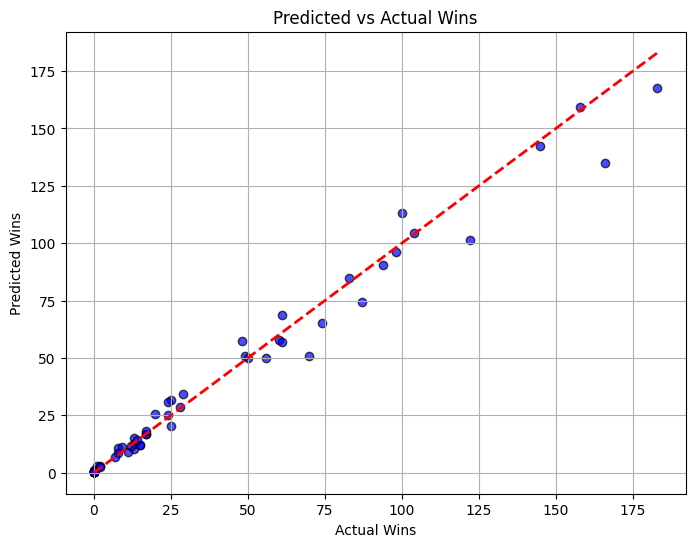

In [26]:
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 

features = ["Clean sheets", "Appearances", "Recoveries", "Duels won", "Passes", "Goals conceded", "Tackles"]
#features = ["Appearances", "Recoveries", "Duels won", "Passes", "Tackles"]
print(df_cleaned[features + ["Wins"]].isna().sum())
print(len(df_cleaned[df_cleaned["Position"] == "Midfielder"]))
print(len(df_cleaned[df_cleaned["Position"] == "Forward"]))
print(len(df_cleaned[df_cleaned["Position"] == "Defender"]))



model_cleaned = df_cleaned[df_cleaned["Position"] != "Goalkeeper"]

model_cleaned = model_cleaned.dropna(subset=features + ["Wins"])


X = model_cleaned[features]
y = model_cleaned["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

print(len(X_test))
print(len(y_test))
print(len(predictions))
positions = []
for index, row in df_cleaned.iterrows():
    positions.append(row["Position"])

print(list(set(positions)))


# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Wins")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.grid(True)
plt.show()

In [27]:
# David Luiz

single_player_features = {
    "Clean sheets": 64,
    "Appearances": 194,
    "Recoveries": 1042,
    "Duels won": 846,
    "Passes": 10165,
    "Goals conceded": 173,
    "Tackles": 240    
}

# Convert to DataFrame
single_player_df = pd.DataFrame([single_player_features])

# Predict wins
predicted_wins = model.predict(single_player_df)

# Display the result
print(f"Predicted Wins for the player: {predicted_wins[0]:.2f}")

Predicted Wins for the player: 108.45


mean_squared_error :  78.65951126499154
mean_absolute_error :  5.394404012784784


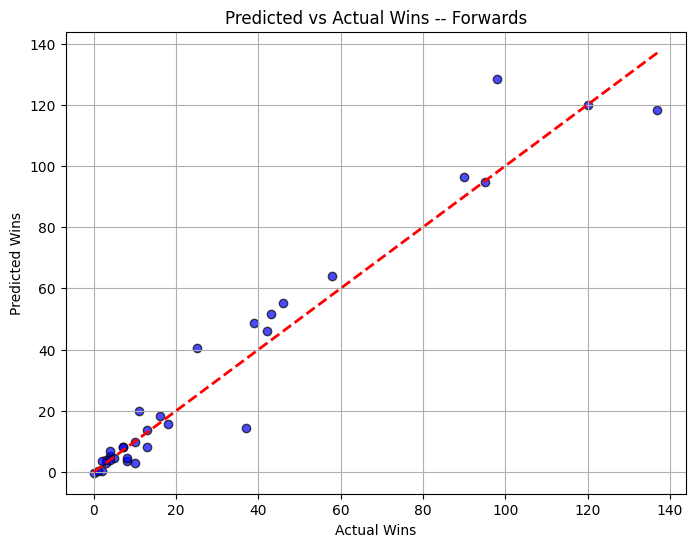

In [28]:
#Assists    Passes  Appearances  Shots on target     Shots
f_features = ["Assists", "Passes", "Appearances", "Shots on target", "Shots"]
model_cleaned = df_cleaned[df_cleaned["Position"] == "Forward"]
model_cleaned = model_cleaned.dropna(subset=f_features + ["Wins"])

X = model_cleaned[f_features]
y = model_cleaned["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Wins -- Forwards")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.grid(True)
plt.show()

In [29]:
# Gabriel Martinelli

single_player_features = {
    "Assists": 0,
    "Passes": 116,
    "Appearances": 14,
    "Shots on target": 5,
    "Shots": 12
}

# Convert to DataFrame
single_player_df = pd.DataFrame([single_player_features])

# Predict wins
predicted_wins = model.predict(single_player_df)

# Display the result
print(f"Predicted Wins for the player: {predicted_wins[0]:.2f}")

Predicted Wins for the player: 2.34


mean_squared_error :  79.09584502689536
mean_absolute_error :  5.841443971134195


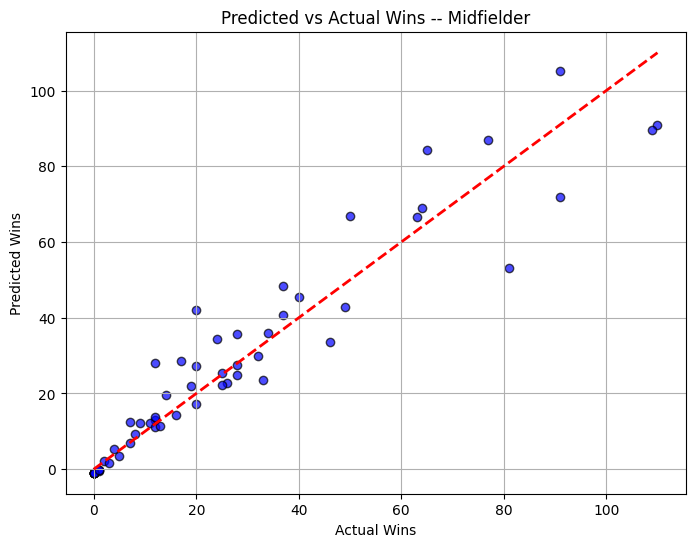

In [30]:
#Appearances    Passes  Duels lost  Duels won  Recoveries
m_features = ["Appearances", "Passes", "Duels lost", "Duels won", "Recoveries"]
model_cleaned = df_cleaned[df_cleaned["Position"] == "Midfielder"]
model_cleaned = model_cleaned.dropna(subset=m_features + ["Wins"])

X = model_cleaned[m_features]
y = model_cleaned["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Wins -- Midfielder")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.grid(True)
plt.show()

In [31]:
# Granit Xhaka

single_player_features = {
    "Appearances": 132,
    "Passes": 9739,
    "Duels lost": 650,
    "Duels won": 607,
    "Recoveries": 885
}

# Convert to DataFrame
single_player_df = pd.DataFrame([single_player_features])

# Predict wins
predicted_wins = model.predict(single_player_df)

# Display the result
print(f"Predicted Wins for the player: {predicted_wins[0]:.2f}")

Predicted Wins for the player: 82.60


mean_squared_error :  52.17647090344411
mean_absolute_error :  4.703223115341432


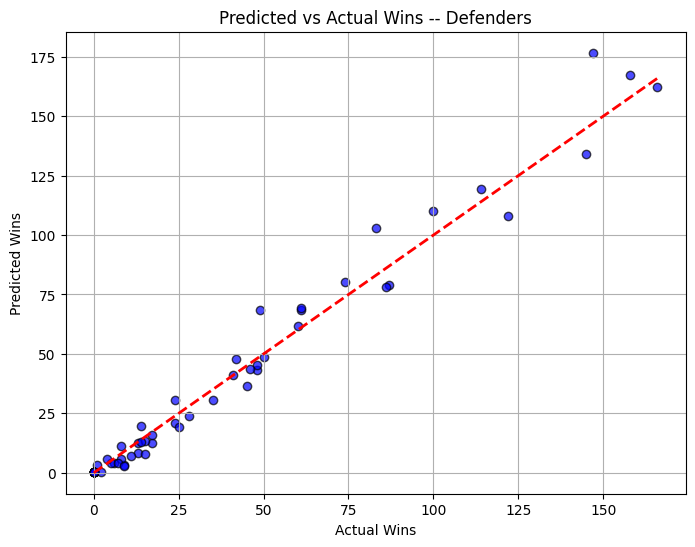

In [32]:
#Clean sheets    Passes  Recoveries  Appearances  Duels won  
d_features = ["Appearances", "Passes", "Clean sheets", "Duels won", "Recoveries"]
model_cleaned = df_cleaned[df_cleaned["Position"] == "Defender"]
model_cleaned = model_cleaned.dropna(subset=d_features + ["Wins"])

X = model_cleaned[d_features]
y = model_cleaned["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Wins -- Defenders")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.grid(True)
plt.show()

In [33]:
# David Luiz

single_player_features = {
    "Appearances": 194,
    "Passes": 10165,
    "Clean sheets": 64,
    "Duels won": 846,    
    "Recoveries": 1042
}

# Convert to DataFrame
single_player_df = pd.DataFrame([single_player_features])

# Predict wins
predicted_wins = model.predict(single_player_df)

# Display the result
print(f"Predicted Wins for the player: {predicted_wins[0]:.2f}")

Predicted Wins for the player: 109.58


mean_squared_error:  128.76256409783326
mean_absolute_error:  7.264238073320358


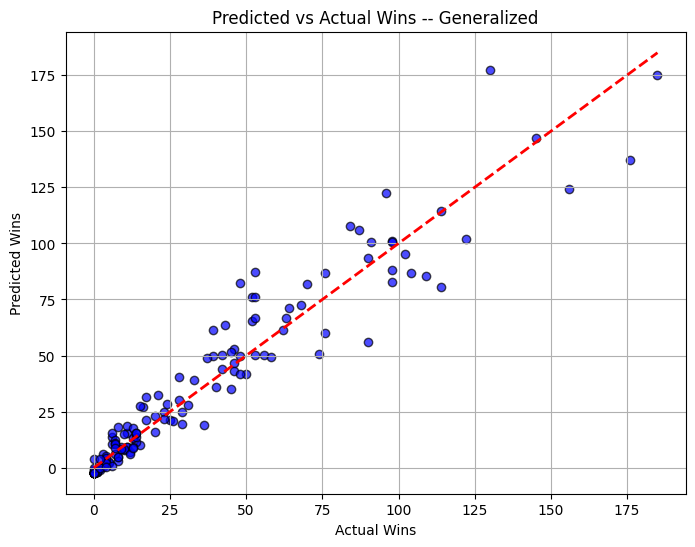

In [34]:
# Appearances Passes Tackles
g_features = ["Appearances", "Passes", "Tackles"]
model_cleaned = df_cleaned
model_cleaned = model_cleaned.dropna(subset=g_features + ["Wins"])

X = model_cleaned[g_features]
y = model_cleaned["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('mean_squared_error: ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error: ', mean_absolute_error(y_test, predictions)) 

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title("Predicted vs Actual Wins -- Generalized")
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.grid(True)
plt.show()

In [35]:
player_names = ["Gabriel Martinelli", "Granit Xhaka", "David Luiz"]

# Extract data for the specific players
specific_players = df_cleaned[df_cleaned["Name"].isin(player_names)]

specific_players_features = specific_players[g_features]

# Predict wins for the extracted players
predicted_wins = model.predict(specific_players_features)

# Add predictions to the extracted player data
specific_players["Predicted Wins"] = predicted_wins

# Display the results
print(specific_players[["Name", "Predicted Wins"]])

                  Name  Predicted Wins
10          David Luiz      107.168956
20        Granit Xhaka       81.933428
28  Gabriel Martinelli        2.127755


C:\Users\mg416\AppData\Local\Temp\ipykernel_2216\3563449276.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_players["Predicted Wins"] = predicted_wins
